In [1]:
import pandas as pd
import scipy as sp
import scipy.stats
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
plt.style.use(['seaborn-whitegrid'])
warnings.filterwarnings(action='ignore')

from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler

In [2]:
wine = load_wine()
wine_data = wine.data
wine_df = pd.DataFrame(data=wine_data, columns=wine.feature_names)
wine_df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [3]:
scaler = StandardScaler()
wine_scaled = scaler.fit_transform(wine_df)

wine_df_scaled = pd.DataFrame(data=wine_scaled, columns=wine.feature_names)

In [4]:
df_Zscore = pd.DataFrame()
outlier_dict={}
outlier_idx_list=[]

for one_col in wine_df_scaled.columns:

    df_Zscore[f'{one_col}_Zscore'] = sp.stats.zscore(wine_df_scaled[one_col])
    outlier_dict[one_col] = df_Zscore[f'{one_col}_Zscore'][(df_Zscore[f'{one_col}_Zscore']>2)|(df_Zscore[f'{one_col}_Zscore']<-2)]
    outlier_idx_list.append(list(outlier_dict[one_col].index))

print(outlier_dict)
print('before', wine_df_scaled.shape)
all_outlier_idx = sum(outlier_idx_list, [])
wine_df_scaled = wine_df_scaled.drop(all_outlier_idx)
print("After (drop outliner)", wine_df_scaled.shape)

{'alcohol': 8      2.259772
13     2.160950
115   -2.434235
Name: alcohol_Zscore, dtype: float64, 'malic_acid': 123    3.109192
136    2.139716
137    2.848870
143    2.346179
146    2.426968
147    2.040973
155    2.561618
169    2.031997
173    2.974543
Name: malic_acid_Zscore, dtype: float64, 'ash': 25     3.119772
59    -3.679162
66    -2.436346
69    -2.253579
76    -2.399793
100   -2.436346
112    2.023170
121    3.156325
Name: ash_Zscore, dtype: float64, 'alcalinity_of_ash': 1     -2.490847
13    -2.430790
14    -2.250619
50    -2.130505
59    -2.671018
73     3.154511
121    2.704083
122    2.103513
127    2.704083
157    2.253656
Name: alcalinity_of_ash_Zscore, dtype: float64, 'magnesium': 33    2.264972
69    3.599025
73    2.756465
78    2.545825
89   -2.088255
95    4.371372
96    2.405399
Name: magnesium_Zscore, dtype: float64, 'total_phenols': 3      2.491446
52     2.539515
146   -2.107246
Name: total_phenols_Zscore, dtype: float64, 'flavanoids': 121    3.062832
Name: fl

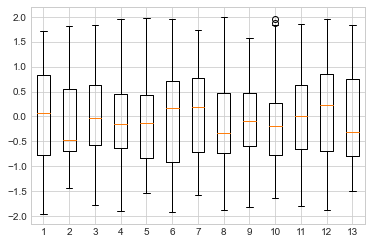

In [5]:
plt.boxplot(wine_df_scaled);

In [7]:
wine_df_scaled.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
count,121.000000,121.000000,121.000000,121.000000,121.000000,121.000000,121.000000,121.000000,121.000000,121.000000,121.000000,121.000000,121.000000
mean,0.000666,-0.112973,-0.018082,-0.009649,-0.093268,-0.031763,0.022721,-0.138802,-0.105107,-0.134593,-0.001646,0.094740,-0.052533
std,0.965373,0.846332,0.840159,0.814119,0.841861,0.965764,0.916304,0.887703,0.781437,0.822068,0.887382,0.996976,0.930877
min,-1.964835,-1.432983,-1.778385,-1.890277,-1.526548,-1.914966,-1.565455,-1.868234,-1.823742,-1.634288,-1.787619,-1.866805,-1.493188
25%,-0.778980,-0.687923,-0.572122,-0.629080,-0.824415,-0.921521,-0.712083,-0.740141,-0.597284,-0.782125,-0.646911,-0.694478,-0.786230
50%,0.061000,-0.472483,-0.023821,-0.148624,-0.122282,0.168065,0.181447,-0.337251,-0.089179,-0.198156,0.011190,0.237735,-0.308556
75%,0.839217,0.559829,0.634140,0.451946,0.439425,0.712858,0.763748,0.468530,0.471488,0.277671,0.625418,0.859210,0.758249
max,1.716255,1.816558,1.840403,1.953371,1.984119,1.962676,1.727556,1.999513,1.575301,1.956043,1.853872,1.960915,1.825055
